In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [3]:
plt.isinteractive()

True

In [4]:
tips = sb.load_dataset("tips")

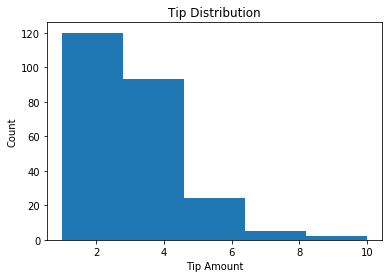

In [5]:
# Histogram 
plt.title("Tip Distribution")
plt.xlabel("Tip Amount")
plt.ylabel("Count")
d = plt.hist(tips['tip'], bins=5)

{'whiskers': [<matplotlib.lines.Line2D at 0x223bc027a20>,
 'caps': [<matplotlib.lines.Line2D at 0x223bc027eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x223bc0275f8>],
 'medians': [<matplotlib.lines.Line2D at 0x223bc0377f0>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x223bc037b38>]}

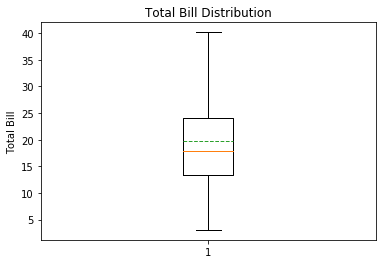

In [6]:
plt.title("Total Bill Distribution")
plt.ylabel("Total Bill")
plt.boxplot(tips['total_bill'], showmeans=True, meanline=True, showfliers=False)

In [8]:
day_total = tips.groupby("day", as_index=False)['total_bill'].sum()

In [56]:
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


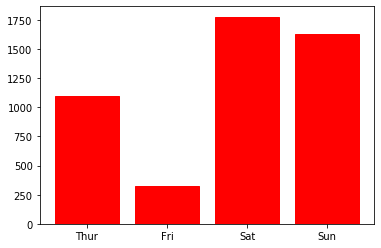

In [13]:
b = plt.bar(x='day',height='total_bill', data=day_total)
for a in b:
    a.set_color('red')

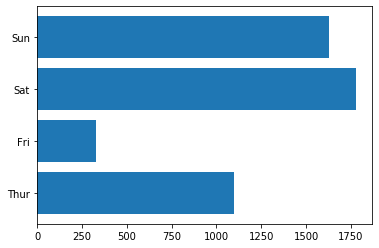

In [15]:
g = plt.barh(y=day_total['day'],width=day_total['total_bill'])

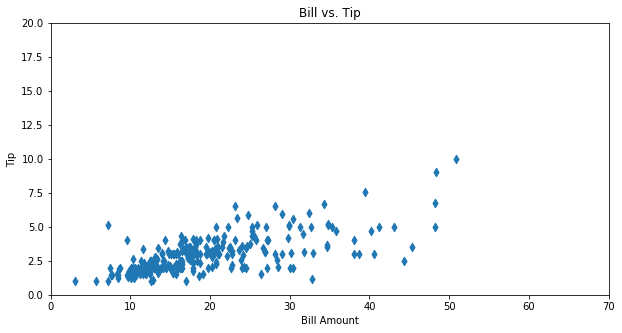

In [19]:
plt.title("Bill vs. Tip")
plt.xlabel("Bill Amount")
plt.ylabel("Tip")
plt.scatter('total_bill','tip', marker='d', data=tips)
plt.gcf().set_size_inches(10,5)
plt.xlim(0,70)
plt.ylim(0,20)
plt.savefig("tips_total.jpg")

In [20]:
img = plt.imread('tips_total.jpg')

In [21]:
type(img)

numpy.ndarray

In [22]:
img.shape

(360, 720, 3)

## Object API

In [23]:
total_tip = tips.groupby("day")['tip'].sum()
total_bill = tips.groupby("day")["total_bill"].sum()

Text(0, 0.5, 'Amount')

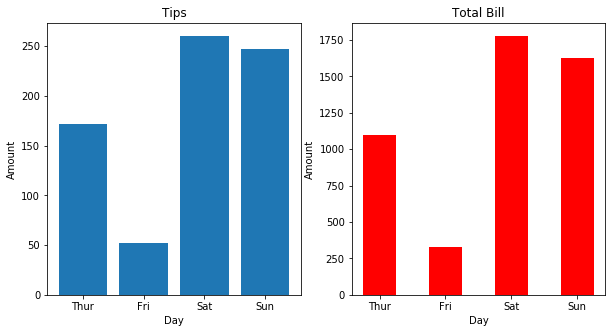

In [26]:
fig,ax = plt.subplots(1,2)   # 1 row x 2 cols
fig.set_size_inches(10,5)
ax[0].bar(x = total_tip.index, height = total_tip.values)
ax[0].set_title("Tips")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Amount")

ax[1].bar(x = total_bill.index, height = total_bill.values, color='r', width=0.5)
ax[1].set_title("Total Bill")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Amount")

In [32]:
total_tip = tips.groupby("day",as_index=False)['tip'].sum()
total_tip

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


Text(0, 0.5, 'Amount')

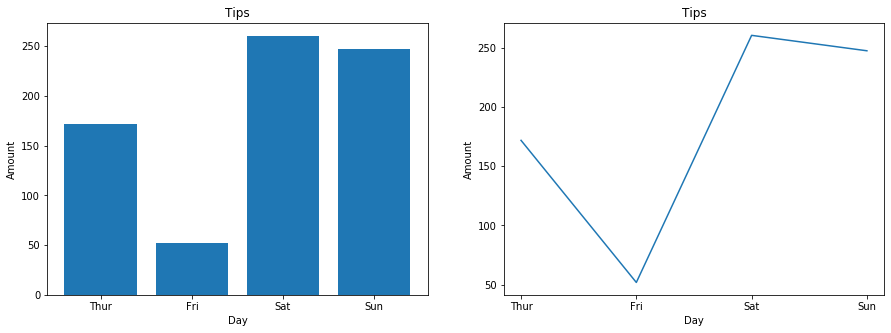

In [35]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].bar(x = total_tip.day, height = total_tip.tip)
ax[0].set_title("Tips")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Amount")

ax[1].plot(list(total_tip.day), list(total_tip.tip))
ax[1].set_title("Tips")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Amount")

In [36]:
total = pd.pivot_table(data = tips, index="day",columns='sex',values='total_bill',aggfunc='sum')
total

sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


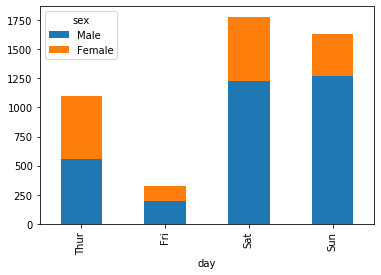

In [38]:
total.plot.bar(stacked=True)

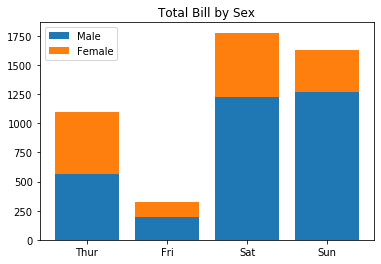

In [40]:
plt.title("Total Bill by Sex")
b1 = plt.bar(x=total.index, height=total['Male'])
b2 = plt.bar(x=total.index, height=total['Female'], bottom = total['Male'])
plt.legend((b1[0], b2[0]), ('Male', 'Female'))

In [43]:
day_total = tips.groupby("day")['total_bill'].sum()

In [42]:
day_total

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

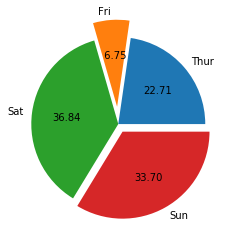

In [44]:
ax = plt.pie(day_total.values, labels = day_total.index, autopct="%5.2f",
             explode=(0,0.2,0,0.1))

### custom line graph

Text(0, 0.5, 'Amt. In Thousands')

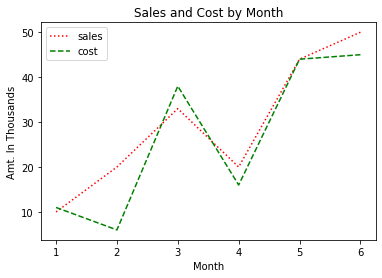

In [46]:
sales = [10,20,33,20,44,50]
cost = [11,6,38,16,44,45]
months = [1,2,3,4,5,6]
plt.plot(months,sales, 'r:',months,cost,'g--')
plt.legend(['sales','cost'])
plt.title("Sales and Cost by Month")
plt.xlabel("Month")
plt.ylabel("Amt. In Thousands")

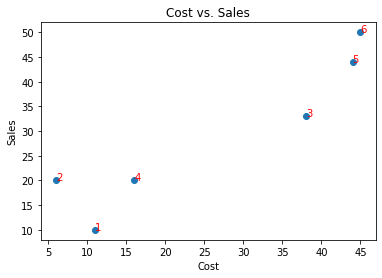

In [49]:
sales = [10,20,33,20,44,50]
cost = [11,6,38,16,44,45]
months = [1,2,3,4,5,6]
plt.scatter(cost,sales)
plt.xlabel("Cost")
plt.ylabel("Sales")
plt.title("Cost vs. Sales")
for i,m in enumerate(months):
   plt.annotate(m, xy=(cost[i],sales[i]), color='r')